In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import pymaster as nmt
from astropy.io import fits
import playsound

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [3]:
NSIDE=2048
y_mask = hp.read_map('/home/zgd/cmb_y/data/Planck/mask/COM_CompMap_Compton-SZMap-masks_2048_R2.01.fits', field=1)
y_mask_HFI_apodized = hp.read_map('/home/zgd/cmb_y/data/Planck/mask/y_mask_HFI_apodized.fits')
y_mask_LFI_apodized = hp.read_map('/home/zgd/cmb_y/data/Planck/mask/y_mask_LFI_apodized.fits')

y_mask = y_mask_HFI_apodized*y_mask_LFI_apodized*y_mask

gal_mask = hp.read_map('/home/zgd/cmb_y/data/unWISE/mask/mask_unWISE_full_v10.fits', field=0)
weight0 = hp.read_map('/home/zgd/cmb_y/data/unWISE/weights/blue_w2_5sig_weights.fits')
weight1 = hp.read_map('/home/zgd/cmb_y/data/unWISE/weights/blue_star_weights.fits')
gal_weights = hp.ud_grade(weight0*weight1,NSIDE)

hdul = fits.open('/home/zgd/cmb_y/data/unWISE/loss/unmaskedareafrac-flag.fits')
gal_loss = hdul[0].data
hdul.close()

np.seterr(divide='ignore', invalid='ignore')
raw_density = hp.read_map('/home/zgd/cmb_y/data/unWISE/blue/numcounts_map1_2048-r1-v2_flag.fits')
galaxy_density = raw_density*gal_mask*gal_weights/gal_loss
galaxy_density[np.isnan(galaxy_density)] = 0

In [5]:
NSIDE = 2048
lmax = 4096
bin = 50

In [8]:
b = nmt.NmtBin.from_nside_linear(NSIDE, bin)
galaxy     = nmt.NmtField(gal_mask, [galaxy_density])
print('g initialized')
cl_gg = nmt.compute_full_master(galaxy, galaxy,b)


g initialized


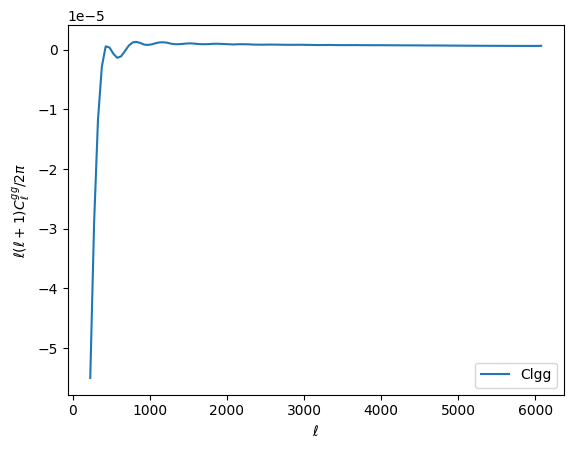

In [28]:
omit = 4
cl_gg_1 = cl_gg[0][omit:]
ll = b.get_effective_ells()[omit:]
pll = ll*(ll+1)/2*np.pi
plt.plot(ll,cl_gg_1,label='Clgg')
plt.legend()
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{gg}/2\pi$')
plt.xlabel(r'$\ell$')
data = np.vstack((ll,cl_gg_1))
np.savetxt('./output/clgg.txt',data)
#plt.savefig('/home/zgd/cmb_y/ver2/output/corr/bin/namaster_CIB_CIBdbeta_CIBdT.png',dpi=300)

In [57]:
#CIB deprojection
ymap_name_list = ['no_deprojection',
                    'CIB+CMB_T=10.17beta=1.7',
                    'CIB+CMB_T=24beta=1.0',
                    'CIB+CMB_T=24beta=1.4',
                    'CIB+CMB_T=10.14beta=1.4',
                    'CIB+CMB_T=10.14beta=1.6']

ymap_path_list = [
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/no_deprojection_standard_full.fits',
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/deproject_CMB_CIB_default_standard_full.fits',
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/SED/deproject_CMB_CIB_beta1.0_T24_standard_full.fits',
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/SED/deproject_CMB_CIB_beta1.4_T24_standard_full.fits',
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/SED/deproject_CMB_CIB_beta1.4_T10.14_standard_full.fits',
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/SED/deproject_CMB_CIB_beta1.6_T10.14_standard_full.fits']

color_list = ['k','r','b','g','c','y']

In [90]:
#CIB + CIBdbeta deprojection
ymap_name_list = [
                'no_deprojection',
                'CMB+CIB+CIBdbeta_T=10.17beta=1.7',
                'CMB+CIB+CIBdbeta_T=24beta=1.0',
                'CMB+CIB+CIBdbeta_T=24beta=1.4',
                'CMB+CIB+CIBdbeta_T=10.14beta=1.4',
                'CMB+CIB+CIBdbeta_T=10.14beta=1.6']
ymap_path_list = [
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/no_deprojection_standard_full.fits',
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/deproject_CMB5_CIB_CIBdbeta_default_standard_full.fits',
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/SED_dbeta/deproject_CMB5_CIB_CIBdbeta_beta1.0_T24_standard_full.fits',
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/SED_dbeta/deproject_CMB5_CIB_CIBdbeta_beta1.4_T24_standard_full.fits',
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/SED_dbeta/deproject_CMB5_CIB_CIBdbeta_beta1.4_T10.14_standard_full.fits',
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/SED_dbeta/deproject_CMB5_CIB_CIBdbeta_beta1.6_T10.14_standard_full.fits']

color_list = ['k','r','b','g','c','y']

In [100]:
#CIB + CIBdbeta + CIBdT deprojection
ymap_name_list = [
                'no_deprojection',
                'CMB+CIB+CIBdbetadT_T=10.17beta=1.7',
                'CMB+CIB+CIBdbetadT_T=24beta=1.0',
                'CMB+CIB+CIBdbetadT_T=24beta=1.4',
                'CMB+CIB+CIBdbetadT_T=10.14beta=1.4',
                'CMB+CIB+CIBdbetadT_T=10.14beta=1.6']

ymap_path_list = [
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/no_deprojection_standard_full.fits',
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/deproject_CMB5_CIB_CIBdbeta_CIBdT_default_standard_full.fits',
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/SED_dbetadT/deproject_CMB5_CIB_CIBdbeta_CIBdT_beta1.0_T24_standard_full.fits',
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/SED_dbetadT/deproject_CMB5_CIB_CIBdbeta_CIBdT_beta1.4_T24_standard_full.fits',
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/SED_dbetadT/deproject_CMB5_CIB_CIBdbeta_CIBdT_beta1.4_T10.14_standard_full.fits',
                '/media/zgd/T7 Shield/data/CMB_ymap/Planck/ymap/SED_dbetadT/deproject_CMB5_CIB_CIBdbeta_CIBdT_beta1.6_T10.14_standard_full.fits']

color_list = ['k','r','b','g','c','y']

In [101]:
ymap_list = []
for i in range(len(ymap_name_list)):
    ymap_list.append(hp.read_map(ymap_path_list[i]))
    print("read ymap: "+ymap_name_list[i])

read ymap: no_deprojection
read ymap: CMB+CIB+CIBdbetadT_T=10.17beta=1.7
read ymap: CMB+CIB+CIBdbetadT_T=24beta=1.0
read ymap: CMB+CIB+CIBdbetadT_T=24beta=1.4
read ymap: CMB+CIB+CIBdbetadT_T=10.14beta=1.4
read ymap: CMB+CIB+CIBdbetadT_T=10.14beta=1.6


In [38]:
# from astropy.table import Table
# dict = {ymap_name_list[i]:i for i in range(len(ymap_name_list))}
# cols = [np.array([1,2,3]) for i in range(len(ymap_name_list))]
# t = Table(cols,names = ymap_name_list)
# t.write('/home/zgd/cmb_y/ver2/output/corr/bin/test.fits', format='fits', overwrite=True)

In [39]:
# hdul = fits.open('/home/zgd/cmb_y/ver2/output/corr/bin/test.fits')
# data = hdul[1].data
# hdul.info()
# hdul.close()

In [103]:
from astropy.table import Table
playsound.playsound('/home/zgd/cmb_y/global/mixkit-confirmation-tone-2867.wav')

b = nmt.NmtBin.from_nside_linear(NSIDE, bin)
galaxy     = nmt.NmtField(gal_mask, [galaxy_density])
print('g initialized')

cols = [b.get_effective_ells()]
names = ['ell']

for i in range(len(ymap_name_list)):
    y_CIB  = nmt.NmtField(y_mask, [ymap_list[i]])
    print('y initialized for '+ymap_name_list[i])

    cl_gy = nmt.compute_full_master(galaxy, y_CIB, b)
    print('namaster done for '+ymap_name_list[i])

    names.append(ymap_name_list[i])
    cols.append(cl_gy[0])
    playsound.playsound('/home/zgd/cmb_y/global/mixkit-confirmation-tone-2867.wav')
    

#save the file in fits format

t = Table(cols,names = names)
t.write('/home/zgd/cmb_y/ver2/output/corr/bin/cl_gy_CIB_CIBdbeta_CIBdT.fits', format='fits', overwrite=True)


g initialized
y initialized for no_deprojection
namaster done for no_deprojection
y initialized for CMB+CIB+CIBdbetadT_T=10.17beta=1.7
namaster done for CMB+CIB+CIBdbetadT_T=10.17beta=1.7
y initialized for CMB+CIB+CIBdbetadT_T=24beta=1.0
namaster done for CMB+CIB+CIBdbetadT_T=24beta=1.0
y initialized for CMB+CIB+CIBdbetadT_T=24beta=1.4
namaster done for CMB+CIB+CIBdbetadT_T=24beta=1.4
y initialized for CMB+CIB+CIBdbetadT_T=10.14beta=1.4
namaster done for CMB+CIB+CIBdbetadT_T=10.14beta=1.4
y initialized for CMB+CIB+CIBdbetadT_T=10.14beta=1.6
namaster done for CMB+CIB+CIBdbetadT_T=10.14beta=1.6


In [104]:
hdul = fits.open('/home/zgd/cmb_y/ver2/output/corr/bin/cl_gy_CIB_CIBdbeta_CIBdT.fits')
data = hdul[1].data
# hdul.info()
hdul.close()

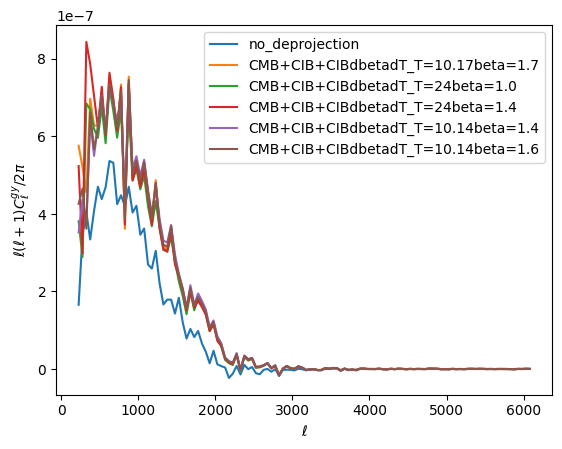

In [111]:
omit = 4
for i in range(len(ymap_name_list)):
    ll = data['ell'][omit:]
    pll = ll*(ll+1)/2*np.pi
    plt.plot(ll,pll*data[ymap_name_list[i]][omit:],label=ymap_name_list[i])
plt.legend()
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{gy}/2\pi$')
plt.xlabel(r'$\ell$')
plt.savefig('/home/zgd/cmb_y/ver2/output/corr/bin/namaster_CIB_CIBdbeta_CIBdT.png',dpi=300)